## **Prepare data**

In [1]:
!pip install researchpy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from researchpy.correlation import corr_case

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv("/content/title_single_valued_attrs.csv", delimiter=',')

In [4]:
df.tail()

,title,romaji_title,english_title,mean_score_anilist,weighted_score_anilist,popularity_anilist,favorites_anilist,duration,status,episodes,source,season_season,season_year,media_type,anilist_url,creator,prequel,sequel,directors,status_completed_anilist,status_planning_anilist,status_current_anilist,status_paused_anilist,status_dropped_anilist,start_date,end_date,mean_score_anisearch,popularity_anisearch,favorites_anisearch,status_completed_anisearch,status_planning_anisearch,status_current_anisearch,status_paused_anisearch,status_dropped_anisearch,number_scorer_anisearch,url,age,mean_score_kitsu,favorite_count_kitsu,rating_rank_kitsu,user_count_kitsu,mean_score_mal,popularity_mal,number_scorer_mal,favorites_mal
2469,the magnificent kotobuki,kouya no kotobuki hikoutai,the magnificent kotobuki,0.64,0.64,8026.0,96.0,24.0,finished,12.0,original work,winter,2019.0,tv,https://anilist.co/anime/104253/kouya-no-kotob...,tsutomu mizushima,NaN,kouya no kotobuki hikoutai: kouya senichiya,NaN,3270.0,2687.0,1140.0,615.0,314.0,2019-01-13,2019-03-31,6.3,3158.0,6.0,80.0,119.0,11.0,6.0,13.0,89.0,"https://www.anisearch.com/anime/13883,the-magn...",pg_13,NaN,NaN,NaN,NaN,6.86,28889.0,8112.0,69.0
2470,tenchi muyou ryououki dai 1ki,tenchi muyou! ryououki dai 1-ki,NaN,0.72,0.72,5832.0,95.0,29.0,finished,6.0,original work,fall,1992.0,ova,https://anilist.co/anime/539/tenchi-muyou-ryou...,hiroki hayashi,NaN,tenchi muyou! ryououki omatsuri zenya no yoru!,hiroki hayashi,3308.0,2167.0,146.0,120.0,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2471,bang dream 3rd season,bang dream! 3rd season,bang dream! 3rd season,0.79,0.78,8003.0,331.0,24.0,finished,13.0,multimedia project,winter,2020.0,tv,https://anilist.co/anime/101634/bang-dream-3rd...,koudai kakimoto,bang dream! 2nd season,bang dream! poppin' dream!,NaN,3997.0,2981.0,668.0,204.0,153.0,2020-01-08,2020-04-07,8.0,1057.0,2.0,19.0,32.0,5.0,0.0,0.0,17.0,"https://www.anisearch.com/anime/13611,bang-dre...",pg_13,NaN,NaN,NaN,NaN,8.05,26456.0,11000.0,482.0
2472,gintama jump festa 2005 special,gintama: jump festa 2005 special,NaN,0.77,0.76,8003.0,56.0,32.0,finished,1.0,manga,fall,2005.0,special,https://anilist.co/anime/2951/gintama-jump-fes...,shinji takamatsu,NaN,NaN,hideaki sorachi,6159.0,1687.0,61.0,53.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2473,rikei ga koi ni ochita no de shoumei shitemita...,rikei ga koi ni ochita no de shoumei shitemita...,NaN,NaN,NaN,8000.0,52.0,NaN,not yet released,NaN,manga,spri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##**Check for null values**

In [5]:
print(df.isnull().sum() / len(df) * 100)
print(f"Total number of records: {len(df)}")

title                          0.000000
romaji_title                   0.000000
english_title                 14.632175
mean_score_anilist             1.818917
weighted_score_anilist         1.980598
popularity_anilist             0.000000
favorites_anilist              0.121261
duration                       2.061439
status                         0.000000
episodes                       1.818917
source                         0.363783
season_season                  2.506063
season_year                    2.546483
media_type                     0.202102
anilist_url                    0.040420
creator                       13.379143
prequel                       70.816492
sequel                        61.843169
directors                     30.921584
status_completed_anilist       0.040420
status_planning_anilist        0.040420
status_current_anilist         0.040420
status_paused_anilist          0.040420
status_dropped_anilist         0.040420
start_date                     9.337106


##**Distribution and Central tendency**

### **Calculate Mode, Mean and Median**

In [6]:
df['mean_score_anilist'] = df['mean_score_anilist'].apply(lambda x: x*10)

In [7]:
# Anilist
# Prepare data
df_anilist = df.dropna(subset=['mean_score_anilist'])
df_anilist.reset_index(drop=True, inplace=True)
# df_anilist.head()
# Calculate mode
mode_anilist = df_anilist['mean_score_anilist'].mode().iloc[0]
print(mode_anilist) 
# Calculate mean
mean_anilist = round(df_anilist['mean_score_anilist'].mean(), 2)
print(mean_anilist)
# Calculate median
median_anilist = df_anilist['mean_score_anilist'].median()
print(median_anilist)

7.1
7.08
7.1


In [8]:
# print(df_anilist.isnull().sum() / len(df_anilist) * 100)
# print(f"Total number of records: {len(df_anilist)}")
print(len(df_anilist['mean_score_anilist']))

2429


In [9]:
# Anisearch
# Prepare data
df_anisearch = df.dropna(subset=['mean_score_anisearch'])
df_anisearch.reset_index(drop=True, inplace=True)
# Calculate mode
mode_anisearch = df_anisearch['mean_score_anisearch'].mode().iloc[0]
print(mode_anisearch) 
# Calculate mean
mean_anisearch = round(df_anisearch['mean_score_anisearch'].mean(), 2)
print(mean_anisearch)
# Calculate median
median_anisearch = df_anisearch['mean_score_anisearch'].median()
print(median_anisearch)
print(len(df_anisearch['mean_score_anisearch']))

6.76
6.91
7.0
1817


In [10]:
# Mal
# Prepare data
df_mal = df.dropna(subset=['mean_score_mal'])
df_mal.reset_index(drop=True, inplace=True)
# Calculate mode
mode_mal = df_mal['mean_score_mal'].mode().iloc[0]
print(mode_mal) 
# Calculate mean
mean_mal = round(df_mal['mean_score_mal'].mean(), 2)
print(mean_mal)
# Calculate median
median_mal = df_mal['mean_score_mal'].median()
print(median_mal)
print(len(df_mal['mean_score_mal']))

7.51
7.34
7.38
2012


In [11]:
# Kitsu
df_kitsu = df.dropna(subset=['mean_score_kitsu'])
df_kitsu.reset_index(drop=True, inplace=True)
# Calculate mode
mode_kitsu = df_kitsu['mean_score_kitsu'].mode().iloc[0]
print(mode_kitsu) 
# Calculate mean
mean_kitsu = round(df_kitsu['mean_score_kitsu'].mean(), 2)
print(mean_kitsu)
# Calculate median
median_kitsu = df_kitsu['mean_score_kitsu'].median()
print(median_kitsu)
print(len(df_kitsu['mean_score_kitsu']))

8.21
7.32
7.37
1491


### **Distribution Subplots**

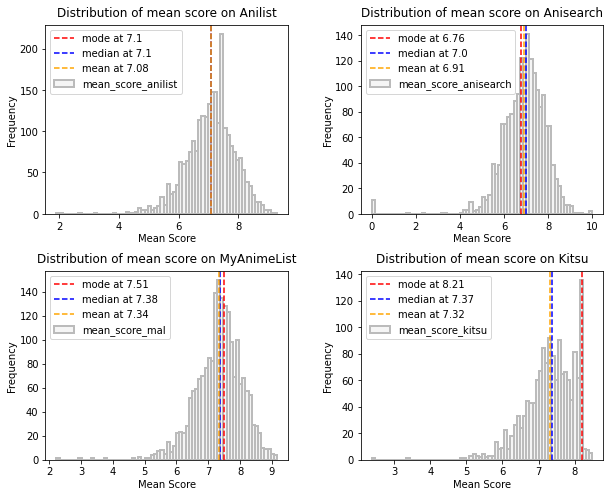

In [12]:
# Plot distribution
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
# Anilist
df['mean_score_anilist'].plot(kind='hist', figsize=(10, 8), linewidth=2, 
                            bins=70, color='whitesmoke', 
                            edgecolor='#BBBBBB', ax=ax[0, 0])
ax[0, 0].set_xlabel('Mean Score', labelpad=2.2)
ax[0, 0].set_ylabel('Frequency', labelpad=2.2)
ax[0, 0].set_title('Distribution of mean score on Anilist', y=1.012, fontsize=12)
measurements = [mode_anilist, median_anilist, mean_anilist]
names = ['mode', 'median', 'mean']
colors = ['red', 'blue', 'orange']
for measurement, name, color in zip(measurements, names, colors):
      ax[0, 0].axvline(x=measurement, linestyle='--', linewidth=1.5, label='{0} at {1}'.format(name, measurement), c=color)
ax[0, 0].legend()

# Anisearch
df['mean_score_anisearch'].plot(kind='hist', figsize=(10, 8), linewidth=2, 
                            bins=70, color='whitesmoke', 
                            edgecolor='#BBBBBB', ax=ax[0, 1])
ax[0, 1].set_xlabel('Mean Score', labelpad=2.2)
ax[0, 1].set_ylabel('Frequency', labelpad=2.2)
ax[0, 1].set_title('Distribution of mean score on Anisearch', y=1.012, fontsize=12)
measurements = [mode_anisearch, median_anisearch, mean_anisearch]
names = ['mode', 'median', 'mean']
colors = ['red', 'blue', 'orange']
for measurement, name, color in zip(measurements, names, colors):
      ax[0, 1].axvline(x=measurement, linestyle='--', linewidth=1.5, label='{0} at {1}'.format(name, measurement), c=color)
ax[0, 1].legend()

# MAL
df['mean_score_mal'].plot(kind='hist', figsize=(10, 8), linewidth=2, 
                            bins=70, color='whitesmoke', 
                            edgecolor='#BBBBBB', ax=ax[1, 0])
ax[1, 0].set_xlabel('Mean Score', labelpad=2.2)
ax[1, 0].set_ylabel('Frequency', labelpad=2.2)
ax[1, 0].set_title('Distribution of mean score on MyAnimeList', y=1.012, fontsize=12)
measurements = [mode_mal, median_mal, mean_mal]
names = ['mode', 'median', 'mean']
colors = ['red', 'blue', 'orange']
for measurement, name, color in zip(measurements, names, colors):
      ax[1, 0].axvline(x=measurement, linestyle='--', linewidth=1.5, label='{0} at {1}'.format(name, measurement), c=color)
ax[1, 0].legend()

# Kitsu
df['mean_score_kitsu'].plot(kind='hist', figsize=(10, 8), linewidth=2, 
                            bins=70, color='whitesmoke', 
                            edgecolor='#BBBBBB', ax=ax[1, 1])
ax[1, 1].set_xlabel('Mean Score', labelpad=2.2)
ax[1, 1].set_ylabel('Frequency', labelpad=2.2)
ax[1, 1].set_title('Distribution of mean score on Kitsu', y=1.012, fontsize=12)
measurements = [mode_kitsu, median_kitsu, mean_kitsu]
names = ['mode', 'median', 'mean']
colors = ['red', 'blue', 'orange']
for measurement, name, color in zip(measurements, names, colors):
      ax[1, 1].axvline(x=measurement, linestyle='--', linewidth=1.5, label='{0} at {1}'.format(name, measurement), c=color)
ax[1, 1].legend()


plt.subplots_adjust(wspace=0.3, hspace=0.3)


## **Correlation Heatmaps**

In [ ]:
df.head()

,title,romaji_title,english_title,mean_score_anilist,weighted_score_anilist,popularity_anilist,favorites_anilist,duration,status,episodes,source,season_season,season_year,media_type,anilist_url,creator,prequel,sequel,directors,status_completed_anilist,status_planning_anilist,status_current_anilist,status_paused_anilist,status_dropped_anilist,start_date,end_date,mean_score_anisearch,popularity_anisearch,favorites_anisearch,status_completed_anisearch,status_planning_anisearch,status_current_anisearch,status_paused_anisearch,status_dropped_anisearch,number_scorer_anisearch,url,age,mean_score_kitsu,favorite_count_kitsu,rating_rank_kitsu,user_count_kitsu,mean_score_mal,popularity_mal,number_scorer_mal,favorites_mal
0,attack on titan,shingeki no kyojin,attack on titan,8.5,0.85,500176.0,46026.0,24.0,finished,25.0,manga,spring,2013.0,tv,https://anilist.co/anime/16498/shingeki-no-kyo...,tetsurou araki,shingeki no kyojin gaiden: kuinaki sentaku,shingeki no kyojin 2,hajime isayama,417696.0,35820.0,29872.0,8863.0,7925.0,2013-04-07,2013-09-28,8.60,31.0,1018.0,7017.0,472.0,584.0,70.0,102.0,6963.0,"https://www.anisearch.com/anime/8219,attack-on...",r,8.49,6835.0,11.0,350376.0,8.51,3104669.0,2168959.0,137690.0
1,death note,death note,death note,8.4,0.84,454179.0,34209.0,23.0,finished,37.0,manga,fall,2006.0,tv,https://anilist.co/anime/1535/death-note/,tetsurou araki,NaN,NaN,NaN,352362.0,45544.0,26067.0,16071.0,14135.0,2006-10-04,2007-06-27,9.00,4.0,1182.0,11442.0,452.0,916.0,128.0,295.0,11737.0,"https://www.anisearch.com/anime/3633,death-note",r,8.36,5750.0,25.0,303639.0,8.63,3130472.0,2159771.0,142925.0
2,my hero academia,boku no hero academia,my hero academia,7.9,0.79,452700.0,23439.0,24.0,finished,13.0,manga,spring,2016.0,tv,https://anilist.co/anime/21459/boku-no-hero-ac...,kenji nagasaki,NaN,boku no hero academia 2,kouhei horikoshi,372716.0,37987.0,28066.0,7123.0,6808.0,2016-04-03,2016-06-26,8.18,152.0,273.0,3415.0,414.0,188.0,21.0,36.0,3185.0,"https://www.anisearch.com/anime/10978,my-hero-...",pg,8.45,4349.0,15.0,325631.0,7.99,2396529.0,1624157.0,50118.0
3,demon slayer kimetsu no yaiba,kimetsu no yaiba,demon slayer: kimetsu no yaiba,8.5,0.85,444903.0,38842.0,24.0,finished,26.0,manga,spring,2019.0,tv,https://anilist.co/anime/101922/kimetsu-no-yaiba/,haruo sotozaki,NaN,kimetsu no yaiba: mugen ressha-hen,koyoharu gotouge,340821.0,48268.0,39899.0,9597.0,6318.0,2019-04-06,2019-09-28,8.68,20.0,237.0,2384.0,528.0,297.0,45.0,43.0,2335.0,"https://www.anisearch.com/anime/13658,demon-sl...",r,NaN,NaN,NaN,NaN,8.57,2069110.0,1380152.0,67452.0
4,hunter x hunter 2011,hunter×hunter (2011),hunter x hunter (2011),9.0,0.90,415793.0,54890.0,24.0,finished,148.0,manga,fall,2011.0,tv,https://anilist.co/anime/11061/hunterhunter-2011/,hiroshi koujina,NaN,NaN,yoshihiro togashi,246373.0,69790.0,63687.0,27573.0,8370.0,2011-10-02,2014-09-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pg,8.43,6271.0,18.0,243790.0,9.06,2123271.0,1245840.0,164535.0


###**Prepare Data**


In [13]:
# Anilist
df_anilist = df.dropna(subset=[ 'weighted_score_anilist', 'popularity_anilist',
                         'favorites_anilist'])
df_anilist = df_anilist[['mean_score_anilist', 'weighted_score_anilist', 'popularity_anilist',
                         'favorites_anilist']]
df_anilist.head(3)

,mean_score_anilist,weighted_score_anilist,popularity_anilist,favorites_anilist
0,8.5,0.85,500176.0,46026.0
1,8.4,0.84,454179.0,34209.0
2,7.9,0.79,452700.0,23439.0


In [18]:
# Anisearch
df_anisearch = df.dropna(subset=['mean_score_anisearch', 'favorites_anisearch', 'number_scorer_anisearch'])
df_anisearch = df_anisearch[['mean_score_anisearch', 'favorites_anisearch', 'number_scorer_anisearch']]                      
# df_anisearch.rename(columns = {'number_scorer_anisearch':'popularity_anisearch'}, inplace = True)
df_anisearch.head()

,mean_score_anisearch,favorites_anisearch,number_scorer_anisearch
0,8.60,1018.0,6963.0
1,9.00,1182.0,11737.0
2,8.18,273.0,3185.0
3,8.68,237.0,2335.0
5,8.54,383.0,4311.0


In [15]:
# MAL
df_mal = df.dropna(subset=['mean_score_mal', 'popularity_mal', 'number_scorer_mal',
                                'favorites_mal'])
df_mal = df_mal[['mean_score_mal', 'popularity_mal', 'number_scorer_mal',
                  'favorites_mal']]
df_mal.head()

,mean_score_mal,popularity_mal,number_scorer_mal,favorites_mal
0,8.51,3104669.0,2168959.0,137690.0
1,8.63,3130472.0,2159771.0,142925.0
2,7.99,2396529.0,1624157.0,50118.0
3,8.57,2069110.0,1380152.0,67452.0
4,9.06,2123271.0,1245840.0,164535.0


In [16]:
# Kitsu
df_kitsu = df.dropna(subset=['mean_score_kitsu','favorite_count_kitsu', 'user_count_kitsu'])
df_kitsu = df_kitsu[['mean_score_kitsu','user_count_kitsu', 'favorite_count_kitsu']]
df_kitsu.rename(columns = {'user_count_kitsu':'popularity_kitsu', 'favorite_count_kitsu':'favorites_kitsu'}, inplace = True)
df_kitsu.head(5)

,mean_score_kitsu,popularity_kitsu,favorites_kitsu
0,8.49,350376.0,6835.0
1,8.36,303639.0,5750.0
2,8.45,325631.0,4349.0
4,8.43,243790.0,6271.0
5,8.35,341696.0,3384.0


### **Heatmap subplots**

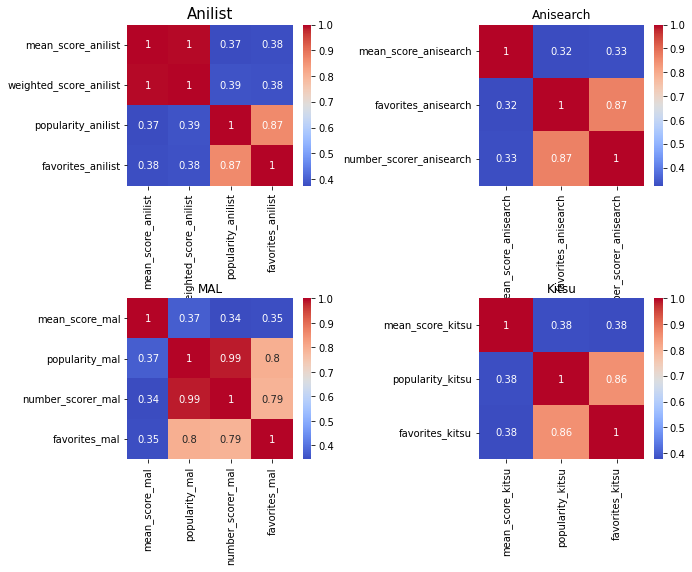

In [17]:
# Subpot heatmap
# Anilist
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
sns.heatmap(df_anilist.corr(), annot=True, cmap="coolwarm", ax=ax[0, 0])
ax[0, 0].set_title('Anilist', fontsize=15)
# ax[0, 0].tick_params(axis='x', labelrotation=30)

# Anisearch
ax[0, 1].set_title('Anisearch', fontsize=12)
# ax[0, 1].tick_params(axis='x', labelrotation=15)
ax[0, 1].tick_params(axis='y', labelrotation=70)
sns.heatmap(df_anisearch.corr(), annot=True, cmap="coolwarm", ax=ax[0, 1])

# MAL
ax[1, 0].set_title('MAL', fontsize=12)
# ax[1, 0].tick_params(axis='x', labelrotation=15)
ax[1, 0].tick_params(axis='y', labelrotation=70)
sns.heatmap(df_mal.corr(), annot=True, cmap="coolwarm", ax=ax[1, 0])

# Kitsu
ax[1, 1].set_title('Kitsu', fontsize=12)
# ax[1, 0].tick_params(axis='x', labelrotation=15)
ax[1, 1].tick_params(axis='y', labelrotation=70)
sns.heatmap(df_kitsu.corr(), annot=True, cmap="coolwarm", ax=ax[1, 1])
plt.subplots_adjust(wspace=0.7, hspace=0.7)

###**Pairplot**

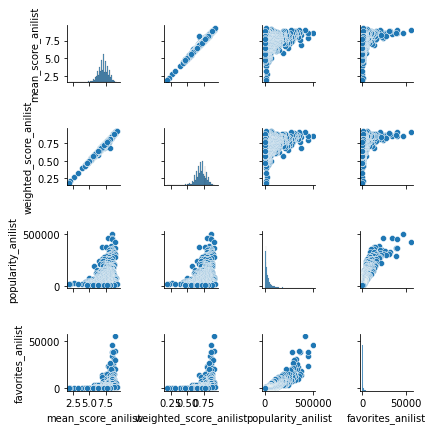

In [ ]:
# Anilist
sns.pairplot(df_anilist, height=1.5)

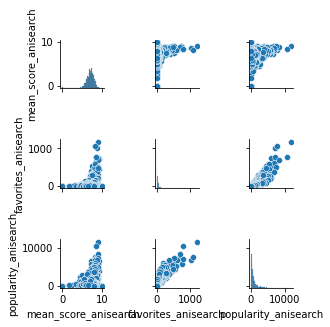

In [ ]:
# Anisearch
sns.pairplot(df_anisearch, height=1.5)

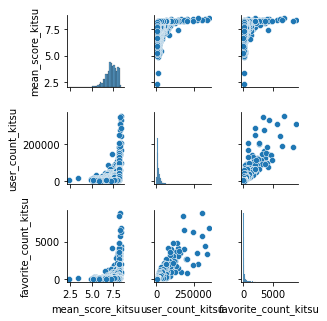

In [ ]:
# Kitsu
sns.pairplot(df_kitsu, height=1.5)

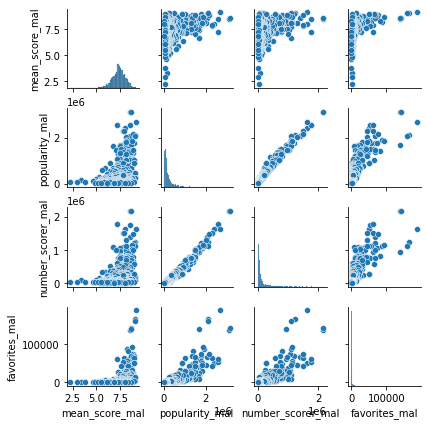

In [ ]:
# MAL
sns.pairplot(df_mal, height=1.5)

## **Correlation Test**


In [ ]:
from researchpy.correlation import corr_case

In [19]:
# Anisearch
corr_case(df_anisearch[['mean_score_anisearch', 'number_scorer_anisearch',
                        'favorites_anisearch' ]])[2]

,mean_score_anisearch,number_scorer_anisearch,favorites_anisearch
mean_score_anisearch,0.0000,0.0000,0.0000
number_scorer_anisearch,0.0000,0.0000,0.0000
favorites_anisearch,0.0000,0.0000,0.0000


In [ ]:
# Anilist
corr_case(df_anilist[['mean_score_anilist', 
                            'weighted_score_anilist',	
                            'popularity_anilist', 'favorites_anilist']])[2]

,mean_score_anilist,weighted_score_anilist,popularity_anilist,favorites_anilist
mean_score_anilist,0.0000,0.0000,0.0000,0.0000
weighted_score_anilist,0.0000,0.0000,0.0000,0.0000
popularity_anilist,0.0000,0.0000,0.0000,0.0000
favorites_anilist,0.0000,0.0000,0.0000,0.0000


In [ ]:
# MAL
corr_case(df_mal[['mean_score_mal',	'popularity_mal',	'number_scorer_mal',	'favorites_mal']])[2]

,mean_score_mal,popularity_mal,number_scorer_mal,favorites_mal
mean_score_mal,0.0000,0.0000,0.0000,0.0000
popularity_mal,0.0000,0.0000,0.0000,0.0000
number_scorer_mal,0.0000,0.0000,0.0000,0.0000
favorites_mal,0.0000,0.0000,0.0000,0.0000


In [ ]:
# Kitsu
corr_case(df_kitsu[['mean_score_kitsu',	'user_count_kitsu',	'favorite_count_kitsu']])[2]

,mean_score_kitsu,user_count_kitsu,favorite_count_kitsu
mean_score_kitsu,0.0000,0.0000,0.0000
user_count_kitsu,0.0000,0.0000,0.0000
favorite_count_kitsu,0.0000,0.0000,0.0000
